You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

In [48]:
import pandas  as pd

In [49]:
data=pd.read_csv("adult.csv")

In [51]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [52]:
data.shape

(48842, 15)

In [53]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [54]:
print(data['workclass'].value_counts())
data['workclass'].replace({'?': 'Others'}, inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-54-4137354587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'Others'}, inplace=True)


In [55]:
print(data['occupation'].value_counts())
data['occupation'].replace({'?': 'Others'}, inplace=True)
print(data['occupation'].value_counts())



occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-55-3964839964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace({'?': 'Others'}, inplace=True)


In [56]:
# Remove irrelevant workclass entries
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']


In [57]:
 # Value counts for insight
print("Relationship:\n", data['relationship'].value_counts())
print("Gender:\n", data['gender'].value_counts())
print("New shape:", data.shape)

Relationship:
 relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64
Gender:
 gender
Male      32629
Female    16182
Name: count, dtype: int64
New shape: (48811, 15)


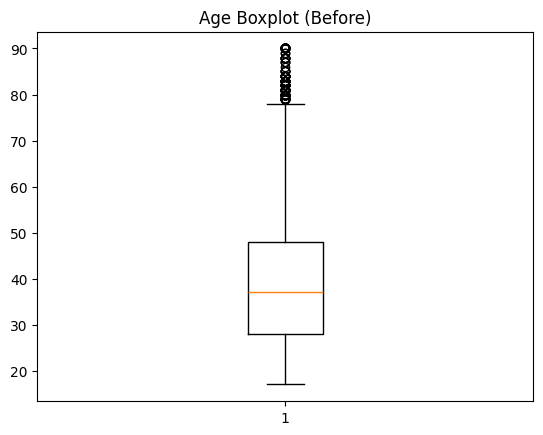

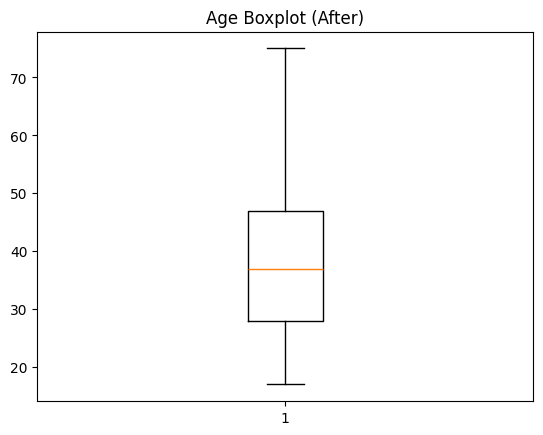

In [58]:
import matplotlib.pyplot as plt

# Age
plt.boxplot(data['age'])
plt.title("Age Boxplot (Before)")
plt.show()
data = data[(data['age'] <= 75) & (data['age'] >= 17)]
plt.boxplot(data['age'])
plt.title("Age Boxplot (After)")
plt.show()

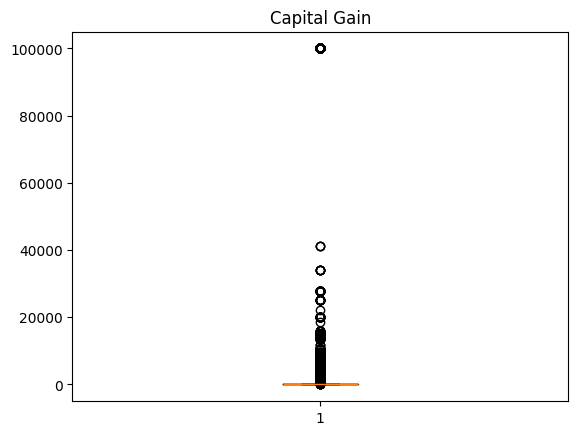

In [59]:
# Capital Gain
plt.boxplot(data['capital-gain'])
plt.title("Capital Gain")
plt.show()

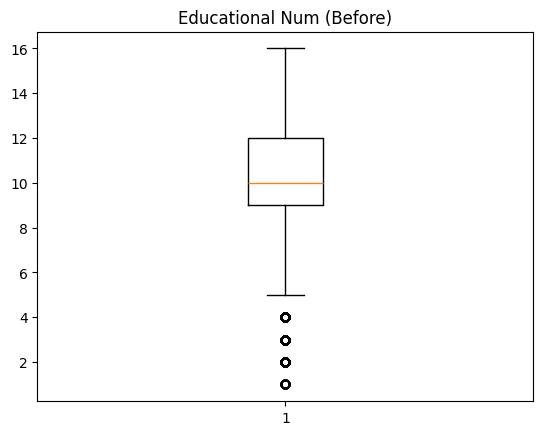

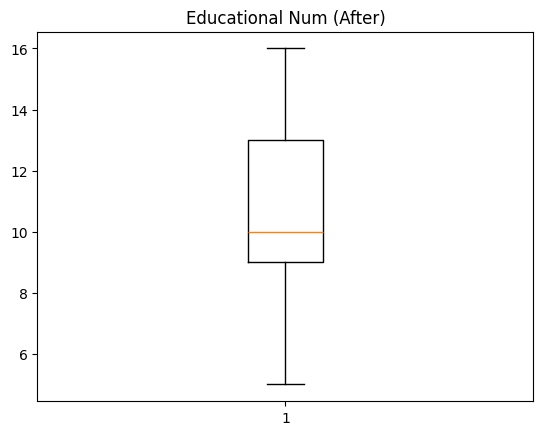

In [60]:
# Educational Num
plt.boxplot(data['educational-num'])
plt.title("Educational Num (Before)")
plt.show()
data = data[(data['educational-num'] <= 16) & (data['educational-num'] >= 5)]
plt.boxplot(data['educational-num'])
plt.title("Educational Num (After)")
plt.show()

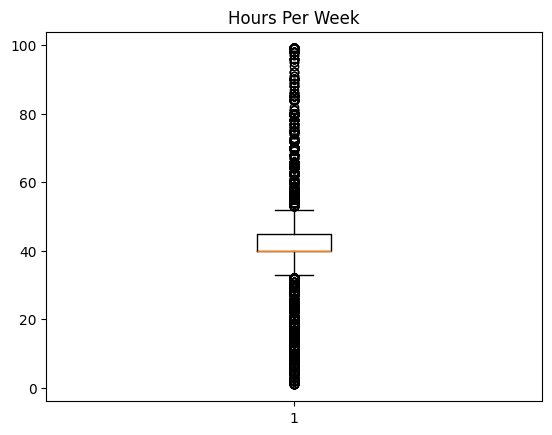

In [61]:
# Hours per week
plt.boxplot(data['hours-per-week'])
plt.title("Hours Per Week")
plt.show()

In [62]:
print("Final shape after cleaning:", data.shape)

Final shape after cleaning: (46720, 15)


In [63]:
from sklearn.preprocessing import LabelEncoder

# Drop redundant column
data = data.drop(columns=['education'])

encoder = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    data[col] = encoder.fit_transform(data[col])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Assuming 'data' and 'income' column exist from previous steps
x = data.drop('income',axis=1)
y = data['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "salary_predictor.pkl")

['salary_predictor.pkl']

In [66]:
# 🔥 FULL WORKING ONE-CELL: Train model + Save + Streamlit + Ngrok

# Step 1: Install requirements
!pip install -q pandas scikit-learn streamlit pyngrok joblib

# Step 2: Download & preprocess dataset, train & save model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols = ['age','workclass','fnlwgt','education','educational-num','marital-status','occupation',
        'relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']
data = pd.read_csv(url, names=cols, na_values=' ?', skipinitialspace=True)

# Clean and preprocess
data.dropna(inplace=True)
data = data[data['workclass'].isin(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'State-gov', 'Federal-gov'])]
data['workclass'] = data['workclass'].replace({
    'Private': 'Private',
    'Self-emp-not-inc': 'Self-emp',
    'Self-emp-inc': 'Self-emp',
    'Local-gov': 'Govt',
    'State-gov': 'Govt',
    'Federal-gov': 'Govt'
})
data['occupation'] = data['occupation'].apply(lambda x: x if x in ['Tech-support', 'Craft-repair', 'Sales', 'Exec-managerial'] else 'Others')
data['marital-status'] = data['marital-status'].apply(lambda x: 'Married' if 'Married' in x else ('Divorced' if 'Divorced' in x else 'Single'))
data['relationship'] = data['relationship'].apply(lambda x: x if x in ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife'] else 'Unmarried')
data['race'] = data['race'].apply(lambda x: x if x in ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo'] else 'Other')
data['gender'] = data['gender'].apply(lambda x: x.strip())
data['native-country'] = data['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else ('India' if x == 'India' else 'Others'))

# Encode labels
label_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Drop irrelevant column
data.drop(columns=['education', 'fnlwgt'], inplace=True)

# Split and train
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "salary_predictor.pkl")

# Step 3: Write Streamlit app
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import numpy as np
import joblib

st.title("💼 Employee Salary Prediction App")

model = joblib.load("salary_predictor.pkl")

workclass_dict = {"Private": 0, "Self-emp": 1, "Govt": 2, "Others": 3}
marital_dict = {"Married": 0, "Single": 1, "Divorced": 2}
occupation_dict = {"Tech-support": 0, "Craft-repair": 1, "Sales": 2, "Exec-managerial": 3, "Others": 4}
relationship_dict = {"Husband": 0, "Not-in-family": 1, "Own-child": 2, "Unmarried": 3, "Wife": 4}
race_dict = {"White": 0, "Black": 1, "Asian-Pac-Islander": 2, "Amer-Indian-Eskimo": 3, "Other": 4}
gender_dict = {"Male": 1, "Female": 0}
country_dict = {"United-States": 0, "India": 1, "Others": 2}

age = st.slider("Age", 17, 75, 30)
workclass = st.selectbox("Workclass", list(workclass_dict.keys()))
educational_num = st.slider("Educational Number", 1, 16, 10)
marital_status = st.selectbox("Marital Status", list(marital_dict.keys()))
occupation = st.selectbox("Occupation", list(occupation_dict.keys()))
relationship = st.selectbox("Relationship", list(relationship_dict.keys()))
race = st.selectbox("Race", list(race_dict.keys()))
gender = st.radio("Gender", list(gender_dict.keys()))
capital_gain = st.number_input("Capital Gain", 0, 99999, 0)
capital_loss = st.number_input("Capital Loss", 0, 99999, 0)
hours_per_week = st.slider("Hours Per Week", 1, 99, 40)
native_country = st.selectbox("Native Country", list(country_dict.keys()))

if st.button("Predict Salary"):
    input_data = np.array([[age,
                            workclass_dict[workclass],
                            educational_num,
                            marital_dict[marital_status],
                            occupation_dict[occupation],
                            relationship_dict[relationship],
                            race_dict[race],
                            gender_dict[gender],
                            capital_gain,
                            capital_loss,
                            hours_per_week,
                            country_dict[native_country]]])
    prediction = model.predict(input_data)[0]
    if prediction == 1:
        st.success("Prediction: Income >50K 💰")
    else:
        st.warning("Prediction: Income <=50K 🧾")


# Sidebar
st.sidebar.title("📌 About This App")
st.sidebar.markdown("""
This is a custom-built ML project:
- Predict employee salary class
- Trained on U.S. Census dataset
- Built using Streamlit + AI (Random Forest or Gradient Boosting)

🛠 Project by: *AMBURU HARSHITH KUMAR*
""")
''')

# Step 4: Run Streamlit + Ngrok
import subprocess
import time
from pyngrok import ngrok

ngrok.set_auth_token("308ywaAOlwlV57gnmNQz54RTIo3_rjou3fs9JBZHHbwoEfH8")  # your token

# Start Streamlit
process = subprocess.Popen(["streamlit", "run", "app.py"])

# Wait and tunnel
time.sleep(5)
public_url = ngrok.connect(8501)
print(f"🚀 Your app is live at: {public_url}")

🚀 Your app is live at: NgrokTunnel: "https://e5ee410fb0c1.ngrok-free.app" -> "http://localhost:8501"
